In [1]:
from dbcp.etl import etl_gridstatus_isoqueues

transformed = etl_gridstatus_isoqueues()

/app/.local/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/app/.local/lib/python3.10/site-packages/pudl/analysis/spatial.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=VOAH7bMa2Pd30hlEeJVWVZNgsBxCzz&access_type=offline


Enter the authorization code:  4/0AfJohXkud0qbhXOUhvOBdJ5YV1t2eMlw40P9gUIpo7tphAcRIqHtgcWdzSBqBRnSXEo-Uw


withdrawn                                    9889
active                                       7156
completed                                    1381
in service                                   1108
done                                          822
engineering and procurement                   330
confirmed                                     224
retracted                                     131
suspended                                     121
deactivated                                    58
under construction                             50
partially in service - under construction      34
annulled                                       24
                                                1
canceled                                        1
Name: status, dtype: Int64


2023-11-29 02:41:11 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 99.39% of records.
2023-11-29 02:41:11 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 94.86% of records.
2023-11-29 02:41:11 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 88.04% of records.
2023-11-29 02:41:11 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 62.23% of records.


In [10]:
for region in transformed.region.unique():
    print(region, transformed.query("region == @region").queue_id.is_unique)

miso False
caiso True
pjm True
ercot True
spp True
nyiso True
isone True


In [12]:
transformed.query("region == 'miso'").queue_id.value_counts()

J2029    2
J2211    2
J2055    2
J2277    2
J2218    2
        ..
J1827    1
J1826    1
J1824    1
J1821    1
J2970    1
Name: queue_id, Length: 1309, dtype: int64

In [14]:
transformed.query("region == 'miso' & queue_id == 'J2029'").drop_duplicates()

,actual_completion_date,capacity_mw,county,resource,interconnecting_entity,interconnection_location,project_name,proposed_completion_date,queue_date,queue_id,state,status,summer_capacity_mw,transmission_owner,winter_capacity_mw,withdrawal_comment,withdrawn_date,region,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,resource_clean
project_id,,,,,,,,,,,,,,,,,,,,,,,,
801,NaT,62.5,Marquette,Solar,<NA>,Perch Lake Substation,<NA>,<NA>,2021-11-30 05:00:00+00:00,J2029,MI,active,62.5,American Transmission Co. LLC,62.5,<NA>,<NA>,miso,26,26103,Marquette,county,Marquette,Solar


## Initial exploration

In [329]:
from google.cloud import storage

import pydata_google_auth
from google.cloud import storage
import os
from dbcp.extract.helpers import get_gcp_credentials

bucket_name = "gridstatus-archive"

GCP_PROJECT_ID = os.environ.get("GCP_PROJECT_ID")

credentials = get_gcp_credentials()

bucket = storage.Client(credentials=credentials, project=GCP_PROJECT_ID).bucket(
    bucket_name, user_project=GCP_PROJECT_ID
)

isos = ['miso', 'caiso', 'pjm', 'ercot', 'spp', 'nyiso', 'isone']

for iso in isos:
    object_name = f"interconnection_queues/{iso}.parquet"

    blob = bucket.blob(str(object_name))
    blob.reload()
    print(iso, blob.time_created, blob.generation)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=GxgNzfNu8Xuid9ik7auDwMn2M3kEBy&access_type=offline


Enter the authorization code:  4/0AfJohXkAwuLJ3NVscUqT5u9bVAa4v6vtuOwX_yUaBZcQVkjwv-3IQmpfXoazbpVwyMSR3g


miso 2023-11-19 19:14:59.958000+00:00 1700421299874397
caiso 2023-11-19 19:15:00.364000+00:00 1700421300276308
pjm 2023-11-15 03:58:44.552000+00:00 1700020724428445
ercot 2023-11-19 19:15:00.758000+00:00 1700421300661013
spp 2023-11-19 19:15:01.135000+00:00 1700421301054116
nyiso 2023-11-19 19:15:01.577000+00:00 1700421301493460
isone 2023-11-19 19:15:01.969000+00:00 1700421301888688


In [77]:
import dbcp

# # These are the revision numbers of the oldest archives we have
# iso_queue_versions: dict[str, str] = {
#     "miso": "1681775160487863",
#     "caiso": "1681775162586588",
#     "pjm": "1681775160979859",
#     "ercot": "1681775161342766",
#     "spp": "1681775162935809",
#     "nyiso": "1681775159356063",
#     "isone": "1681775162111351",
# }

# These are the latest revision numbers as of 11/21/23
iso_queue_versions: dict[str, str] = {
    "miso": "1700421299874397",
    "caiso": "1700421300276308",
    "pjm": "1700020724428445",
    "ercot": "1700421300661013",
    "spp": "1700421301054116",
    "nyiso": "1700421301493460",
    "isone": "1700421301888688",
}

gs_dfs = dbcp.extract.gridstatus_isoqueues.extract(iso_queue_versions)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=hIo1VJ1rWbRCiOUfxaIxkc5StDFk34&access_type=offline


Enter the authorization code:  4/0AfJohXk7kBpQs7utEvdGB89UngWQWCHNWOwvO4qVkcQPXqumRIIeSDv1tccNjnB_Q6jQbA


In [78]:
dfs = list(gs_dfs.values())

common_columns = set(dfs[0])
for df in dfs[0:]:
    common_columns = common_columns.intersection(set(list(df)))

In [79]:
common_columns

{'Actual Completion Date',
 'Capacity (MW)',
 'County',
 'Generation Type',
 'Interconnecting Entity',
 'Interconnection Location',
 'Project Name',
 'Proposed Completion Date',
 'Queue Date',
 'Queue ID',
 'State',
 'Status',
 'Summer Capacity (MW)',
 'Transmission Owner',
 'Winter Capacity (MW)',
 'Withdrawal Comment',
 'Withdrawn Date'}

- How do we build interconnection_status?
- Why keep the raw dates around?
- Why are there three columns for capacity and resource in LBNL? 
- Compare capacity of projects in both marked as active. Correct any outliers?

In [80]:
desired_columns = [
    "project_id", # surrogate key
    "date_proposed_raw", # estimated date of completion?
    "developer", # name of developer, mostly empty?
    "entity", # IDK
    "interconnection_status_lbnl", # IDK
    "interconnection_status_raw", # IDK
    "point_of_interconnection", # List of interconection points
    "project_name", # name of project
    "queue_date", # Date the project enetred the queue
    "queue_id", # raw queue id?
    "queue_status", # basic queue status info
    "queue_year", # year the queue entered
    "region", # region, this will be the iso for GS data
    "resource_type_lbnl", # generation type, use the existing mapping dictionary
    "utility", # name of the uility
    "year_proposed", # year of expected completion
    "date_proposed", # date of expected completion
    "interconnection_date",
    "interconnection_date_raw",
    "interconnection_service_type", # type of service, new generation, incremental improvement
    "queue_date_raw", # raw date the project entered
    "is_actionable", # created from synapses evalutaion of interconnection_status_lbnl
    "is_nearly_certain", # created from synapses evalutaion of interconnection_status_lbnl
]

## Clean common columns

In [197]:
RESOURCE_DICT = {
    "Battery Storage": {
        "codes": {
            "miso": ["Battery Storage"],
            "caiso": [
                "Storage",
                "Storage + Other",
                "Storage + Storage",
                "Storage + Photovoltaic + Wind Turbine",
            ],
            "pjm": ["Storage", "Storage; Solar", "Storage; Wind"],
            "ercot": ["Other - Battery Energy Storage", "Other - Energy Storage"],
            "spp": ["Battery/Storage"],
            "nyiso": ["Energy Storage"],
            "isone": ["BAT"],
        },
        "type": "Renewable",
    },
    "Biofuel": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Biomass": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": ["Biomass - Steam Turbine other than Combined-Cycle"],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Coal": {
        "codes": {
            "miso": ["Coal"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Combustion Turbine": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Fuel Cell": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": ["FC"],
        },
        "type": "Fossil",
    },
    "Geothermal": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Hydro": {
        "codes": {
            "miso": ["Hydro"],
            "caiso": ["Hydro"],
            "pjm": ["Hydro"],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Landfill Gas": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Municipal Solid Waste": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Natural Gas": {
        "codes": {
            "miso": ["Gas"],
            "caiso": [
                "Gas Turbine + Storage",
                "Gas Turbine",
                "Combined Cycle",
                "Combined Cycle + Storage",
            ],
            "pjm": [
                "Natural Gas",
                "Natural Gas; Other",
                "Methane",
                "Gas - Internal Combustion Engine, eg. Reciprocating",
                "Gas - Combined-Cycle",
            ],
            "ercot": [
                "Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle",
                "Gas - Steam Turbine other than Combined-Cycle",
            ],
            "spp": [
                "Thermal - CTG",
                "Thermal - CT",
                "Thermal - Gas Turbine",
                "Thermal - Reciprocating Engine",
                "Thermal",
                "Thermal - Gas",
                "Thermal - Combined Cycle",
                "Thermal - RICE",
            ],
            "nyiso": ["Combined Cycle"],
            "isone": ["NG", "DFO NG", "NG SUN BAT"],
        },
        "type": "Fossil",
    },
    "Nuclear": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Offshore Wind": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": ["Offshore Wind"],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Oil": {
        "codes": {
            "miso": ["Diesel"],
            "caiso": [],
            "pjm": ["Diesel; Solar"],
            "ercot": [],
            "spp": ["Thermal - Diesel/Gas"],
            "nyiso": [],
            "isone": ["KER BAT"],
        },
        "type": "Fossil",
    },
    "Onshore Wind": {
        "codes": {
            "miso": ["Wind"],
            "caiso": [
                "Wind Turbine",
                "Wind Turbine + Storage",
                "Storage + Wind Turbine",
                "Wind Turbine + Photovoltaic + Storage",
                "Wind Turbine + Storage + Photovoltaic",
            ],
            "pjm": ["Wind", "Wind; Solar", "Solar; Storage; Wind"],
            "ercot": ["Wind - Wind Turbine"],
            "spp": ["Wind", "Hybrid - Wind/Storage", "Hybrid - Wind/Solar"],
            "nyiso": ["Wind"],
            "isone": ["WND"],
        },
        "type": "Renewable",
    },
    "Other": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": ["Other"],
            "ercot": ["Other - Other"],
            "spp": ["Hybrid - Solar\RECIP Gas"],
            "nyiso": [],
            "isone": [],
        },
        "type": "Unknown Resource",
    },
    "Unknown": {
        "codes": {
            "miso": ["Hybrid"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": ["Load"],
            "isone": ["WAT", "WDS", "WAT BAT"],
        },
        "type": "Unknown Resource",
    },
    "Other Storage": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Pumped Storage": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Solar": {
        "codes": {
            "miso": ["Solar"],
            "caiso": [
                "Storage + Photovoltaic",
                "Photovoltaic + Storage",
                "Photovoltaic",
                "Solar Thermal + Storage",
                "Photovoltaic + Storage + Wind Turbine",
            ],
            "pjm": ["Solar", "Solar; Storage", "Solar; Wind"],
            "ercot": ["Solar - Photovoltaic Solar"],
            "spp": [
                "Solar",
                "Hybrid - Solar/Storage",
                "Hybrid - Solar/Battery",
                "Hybrid - Solar",
                "Hybrid - Solar/Battery/Wind",
            ],
            "nyiso": ["Solar"],
            "isone": ["SUN", "SUN BAT"],
        },
        "type": "Renewable",
    },
    "Steam": {
        "codes": {
            "miso": [],
            "caiso": ["Steam Turbine + Storage", "Steam Turbine"],
            "pjm": [],
            "ercot": [],
            "spp": ["Thermal - Steam"],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Transmission": {
        "codes": {
            "miso": ["High Voltage DC"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": ["AC Transmission", "DC Transmission"],
            "isone": [],
        },
        "type": "Other",
    },
    "Waste Heat": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
}


In [200]:
long_dict = {}

for clean_name, code_type_dict in RESOURCE_DICT.items():
    for iso, codes in code_type_dict["codes"].items():
        for code in codes:
            if code:
                long_dict[code] = clean_name

In [203]:
pd.Series(["a", "b"]).map({"b": "c"})

0    NaN
1      c
dtype: object

In [261]:
from dbcp.transform.lbnl_iso_queue import (
    parse_date_columns,
    add_county_fips_with_backup_geocoding,
)
import numpy as np

def clean_resource_type(resource_df: pd.DataFrame) -> pd.DataFrame:
    resource_df = resource_df.copy()
    long_dict = {}

    for clean_name, code_type_dict in RESOURCE_DICT.items():
        long_dict[clean_name] = clean_name
        for iso, codes in code_type_dict["codes"].items():
            for code in codes:
                if code:
                    long_dict[code] = clean_name
    
    # There are a couple of empty string values
    resource_df["resource"] = resource_df["resource"].str.strip().replace("", pd.NA)
      
    resource_df["resource_clean"] = resource_df["resource"].fillna("Unknown")
    resource_df["resource_clean"] = resource_df["resource_clean"].map(long_dict)
    
    unmapped = resource_df["resource_clean"].isna()
    if unmapped.sum() != 0:
        debug = resource_df.loc[unmapped, "resource"].value_counts(dropna=False)
        raise AssertionError(f"Unmapped resource types: {debug}")
    return resource_df

def transform(raw_dfs):
    # create one dataframe
    shared_columns_mapping = {
        'Actual Completion Date': 'actual_completion_date',
        'Capacity (MW)': 'capacity_mw',
        'County': 'county',
        'Generation Type': 'resource',
        'Interconnecting Entity': 'interconnecting_entity',
        'Interconnection Location': 'interconnection_location',
        'Project Name': 'project_name',
        'Proposed Completion Date': 'proposed_completion_date',
        'Queue Date': 'queue_date',
        'Queue ID': 'queue_id',
        'State': 'state',
        'Status': 'status',
        'Summer Capacity (MW)': 'summer_capacity_mw',
        'Transmission Owner': 'transmission_owner',
        'Winter Capacity (MW)': 'winter_capacity_mw',
        'Withdrawal Comment': 'withdrawal_comment',
        'Withdrawn Date': 'withdrawn_date'
    }
    projects = []
    for iso, df in raw_dfs.items():
        renamed_df = df[shared_columns_mapping.keys()].rename(columns=shared_columns_mapping).copy()
        # winter_capacity_mw in pjm aligns with the LBNL data
        if iso == "pjm":
            renamed_df["capacity_mw"] = renamed_df["winter_capacity_mw"]
            
        renamed_df["region"] = iso
        projects.append(renamed_df)
    projects = pd.concat(projects)
    projects["status"] = projects.status.str.lower()
    print(projects.status.value_counts()) # What should we count as active?
    active_projects = projects.query("status == 'active'").copy()
    
    # parse dates
    date_cols = [col for col in list(projects) if "date" in col]
    for col in date_cols:
        active_projects[col] = pd.to_datetime(active_projects[col])
    
    # create project_id
    active_projects["project_id"] = np.arange(len(active_projects), dtype=np.int32)
    active_projects = active_projects.set_index("project_id")
    
    # geocode the projects
    active_projects = add_county_fips_with_backup_geocoding(
        active_projects, state_col="state", locality_col="county"
    )
    
    # harmonize types
    active_projects = clean_resource_type(active_projects)
    
    return active_projects
    
    

    


In [262]:
projects = transform(gs_dfs)

withdrawn                                    9889
active                                       7156
completed                                    1381
in service                                   1108
done                                          822
engineering and procurement                   330
confirmed                                     224
retracted                                     131
suspended                                     121
deactivated                                    58
under construction                             50
partially in service - under construction      34
annulled                                       24
                                                1
canceled                                        1
Name: status, dtype: Int64


2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 99.39% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 94.86% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 88.04% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 62.23% of records.


In [267]:
projects["resource_clean"].value_counts(normalize=True)

Solar              0.539407
Battery Storage    0.299748
Onshore Wind       0.079374
Unknown            0.049189
Natural Gas        0.018446
Offshore Wind      0.004891
Transmission       0.003633
Hydro              0.001677
Other              0.001537
Steam              0.000838
Oil                0.000559
Fuel Cell          0.000419
Coal               0.000140
Biomass            0.000140
Name: resource_clean, dtype: float64

<AxesSubplot: title={'center': 'Active projects in ISO queues'}, xlabel='Resource type', ylabel='% all capacity in queue'>

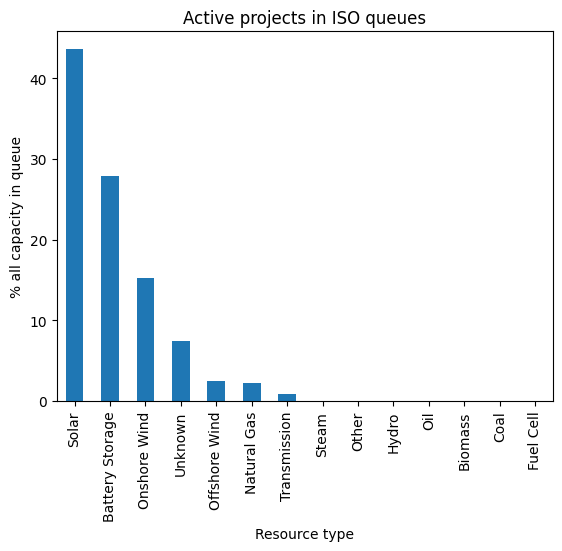

In [285]:
pct_gen_type = projects.groupby("resource_clean").capacity_mw.sum().sort_values(ascending=False) / projects.capacity_mw.sum() * 100

pct_gen_type.plot.bar(ylabel="% all capacity in queue", title="Active projects in ISO queues", xlabel="Resource type")

In [212]:
projects["resource"].eq("").value_counts()

False    7046
True        2
Name: resource, dtype: Int64

In [175]:
RESOURCE_DICT = {
    "Battery Storage": {"codes": ["Energy Storage", "Other - Battery Energy Storage"], "type": "Renewable"},
    "Biofuel": {"codes": [], "type": "Renewable"},
    "Biomass": {"codes": ["Biomass - Steam Turbine other than Combined-Cycle"], "type": "Renewable"},
    "Coal": {"codes": [], "type": "Fossil"},
    "Combustion Turbine": {"codes": [], "type": "Fossil"},
    "Fuel Cell": {"codes": [], "type": "Fossil"},
    "Geothermal": {"codes": [], "type": "Renewable"},
    "Hydro": {"codes": [], "type": "Renewable"},
    "Landfill Gas": {"codes": [], "type": "Fossil"},
    "Municipal Solid Waste": {"codes": [], "type": "Fossil"},
    "Natural Gas": {"codes": ["Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle", "Gas - Internal Combustion Engine, eg. Reciprocating", "Gas - Combined-Cycle", "Gas - Steam Turbine other than Combined-Cycle"], "type": "Fossil"},
    "Nuclear": {"codes": [], "type": "Renewable"},
    "Offshore Wind": {"codes": [], "type": "Renewable"},
    "Oil": {"codes": [], "type": "Fossil"},
    "Onshore Wind": {"codes": ["Wind", "Wind - Wind Turbine"], "type": "Renewable"},
    "Other": {"codes": ["Other - Energy Storage"], "type": "Unknown Resource"},
    "Unknown": {"codes": ["Load", "Combined Cycle", "Other - Other"], "type": "Unknown Resource"},
    "Other Storage": {"codes": [], "type": "Renewable"},
    "Pumped Storage": {"codes": [], "type": "Renewable"},
    "Solar": {"codes": ["Solar", "Solar - Photovoltaic Solar"], "type": "Renewable"},
    "Steam": {"codes": [], "type": "Fossil"},
    "Transmission": {"codes": ["AC Transmission", "DC Transmission"], "type": "Other"},
    "Waste Heat": {"codes": [], "type": "Fossil"},
}


In [178]:
pd.set_option('display.max_colwidth', None)


In [182]:
projects.region.unique()

array(['miso', 'caiso', 'pjm', 'ercot', 'spp', 'nyiso', 'isone'],
      dtype=object)

In [193]:
region = "isone"
projects.query("region == @region").generation_type.value_counts()

SUN           156
BAT           114
SUN BAT        86
WND            38
NG              6
FC              3
DFO NG          3
WAT BAT         2
KER BAT         1
WDS             1
WAT             1
NG SUN BAT      1
Name: generation_type, dtype: Int64

In [187]:
gen_type = "Hybrid"
projects.query("region == @region & generation_type == @gen_type")

,actual_completion_date,capacity_mw,county,generation_type,interconnecting_entity,interconnection_location,project_name,proposed_completion_date,queue_date,queue_id,state,status,summer_capacity_mw,transmission_owner,winter_capacity_mw,withdrawal_comment,withdrawn_date,region,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
project_id,,,,,,,,,,,,,,,,,,,,,,,
11,NaT,150.0,Faribault,Hybrid,<NA>,Huntley to Blue Earth 161kV,<NA>,<NA>,2020-06-23 04:00:00+00:00,J1572,MN,active,150.0,Northern States Power (Xcel Energy),150.0,<NA>,<NA>,miso,27,27043,Faribault,county,Faribault
21,NaT,499.0,Calhoun,Hybrid,<NA>,Argenta to Tompkins 345kV line,<NA>,2025-06-01 04:00:00+00:00,2020-06-25 04:00:00+00:00,J1586,MI,active,499.0,ITC Transmission,499.0,<NA>,<NA>,miso,26,26025,Calhoun,county,Calhoun
29,NaT,100.0,Iberia,Hybrid,<NA>,Morbihan - Hopkins 138kV,<NA>,2025-09-01 04:00:00+00:00,2020-06-23 04:00:00+00:00,J1599,LA,active,100.0,CLECO Corporation,100.0,<NA>,<NA>,miso,22,22045,Iberia,county,Iberia
53,NaT,200.0,Spencer,Hybrid,<NA>,North East (Castle) - Culley 138kV,<NA>,<NA>,2022-02-17 05:00:00+00:00,J1642,IN,active,200.0,"Southern Indiana Gas & Electric Company d/b/a Vectren Energy Delivery of Indiana, Inc.",200.0,<NA>,<NA>,miso,18,18147,Spencer,county,Spencer
76,NaT,100.0,Evangeline,Hybrid,<NA>,Coughlin - Plaisance 138 kV,<NA>,2026-09-01 04:00:00+00:00,2022-07-07 04:00:00+00:00,J1686,LA,active,100.0,CLECO Corporation,100.0,<NA>,<NA>,miso,22,22039,Evangeline,county,Evangeline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,NaT,100.0,Claiborne,Hybrid,<NA>,Haynesville South 115kV Substation,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2958,LA,active,100.0,"Entergy Louisiana, LLC",100.0,<NA>,<NA>,miso,22,22027,Claiborne,county,Claiborne
1326,NaT,200.0,Starke,Hybrid,<NA>,Rollin Schahfer (17SCHAHFER 255110) 345 kV,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2959,IN,active,200.0,Northern Indiana Public Service Company,200.0,<NA>,<NA>,miso,18,18149,Starke,county,Starke
1327,NaT,150.0,Spencer,Hybrid,<NA>,10CULY13 253500 (F.B. Culley ) - 10AEP_T 353586 (tap between Culley (10CULY13 253500) - Grandview (,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2960,IN,active,150.0,"Southern Indiana Gas & Electric Company d/b/a Vectren Energy Delivery of Indiana, Inc.",150.0,<NA>,<NA>,miso,18,18147,Spencer,county,Spencer


In [164]:
projects[["region", "generation_type"]].value_counts().head(30)

region  generation_type                                  
pjm     Solar                                                1529
miso    Solar                                                 685
pjm     Storage                                               627
ercot   Other - Battery Energy Storage                        584
        Solar - Photovoltaic Solar                            381
pjm     Solar; Storage                                        370
miso    Battery Storage                                       270
        Hybrid                                                228
nyiso   Energy Storage                                        204
spp     Solar                                                 203
caiso   Storage                                               199
nyiso   Solar                                                 160
isone   SUN                                                   156
spp     Battery/Storage                                       136
pjm     Wind      

In [151]:
projects.state_id_fips.isna().value_counts()

False    7112
True       44
Name: state_id_fips, dtype: int64

In [152]:
projects.county_id_fips.isna().value_counts()

False    7017
True      139
Name: county_id_fips, dtype: int64

In [132]:
projects.state.isna().value_counts()

False    7118
True       38
Name: state, dtype: int64

In [133]:
projects.county.isna().value_counts()

False    7046
True      110
Name: county, dtype: int64

In [145]:
projects.county.sample(10)

713          Franklin
7200        Brunswick
8697       Dorchester
5965            Adams
7631    Prince Edward
7613           McKean
639            Medina
8             Lincoln
8890           Mercer
7370        Frederick
Name: county, dtype: string

In [126]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 453 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   actual_completion_date    2 non-null      datetime64[ns]
 1   capacity_mw               7128 non-null   Float64       
 2   county                    7046 non-null   string        
 3   generation_type           7048 non-null   string        
 4   interconnecting_entity    1051 non-null   string        
 5   interconnection_location  3850 non-null   string        
 6   project_name              5250 non-null   string        
 7   proposed_completion_date  3076 non-null   object        
 8   queue_date                7152 non-null   object        
 9   queue_id                  7156 non-null   object        
 10  state                     7118 non-null   string        
 11  status                    7156 non-null   string        
 12  summer_capacity_mw 

In [93]:
[col for col in list(projects) if "date" in col]

['actual_completion_date',
 'proposed_completion_date',
 'queue_date',
 'withdrawn_date']

In [119]:
projects["proposed_completion_date"].isna().value_counts()

True     4080
False    3076
Name: proposed_completion_date, dtype: int64

In [120]:
pd.to_datetime(projects["proposed_completion_date"]).isna().value_counts()

True     4080
False    3076
Name: proposed_completion_date, dtype: int64

In [101]:
projects[~projects["proposed_completion_date"].isna()][["proposed_completion_date", "region"]].sample(5)

,proposed_completion_date,region
836,2025-08-25 00:00:00,ercot
1131,2025-07-01 00:00:00,ercot
797,2025-11-30 00:00:00,ercot
1128,2025-12-31 00:00:00,ercot
1172,2025-03-31 00:00:00,ercot


In [112]:
projects.query("region == 'spp'")["proposed_completion_date"]

27       1/5/2028
28     12/31/2030
29     12/31/2030
30     12/31/2030
31     12/31/2030
          ...    
663     12/1/2027
664     12/1/2027
671     9/30/2024
673    12/31/2025
692    12/16/2024
Name: proposed_completion_date, Length: 568, dtype: object

In [113]:
pd.to_datetime(projects.query("region == 'spp'")["proposed_completion_date"])

27    2028-01-05
28    2030-12-31
29    2030-12-31
30    2030-12-31
31    2030-12-31
         ...    
663   2027-12-01
664   2027-12-01
671   2024-09-30
673   2025-12-31
692   2024-12-16
Name: proposed_completion_date, Length: 568, dtype: datetime64[ns]

## Clean individual status columns
Seems like most of the desired columns are shared amongs the ISOs except for the interconnection status information. We'll have collect these separately.

### ERCOT

In [34]:
ercot = gs_dfs["ercot"]
ercot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Queue ID                      1403 non-null   string        
 1   Project Name                  1403 non-null   string        
 2   Interconnecting Entity        1403 non-null   string        
 3   County                        1403 non-null   string        
 4   State                         1403 non-null   string        
 5   Interconnection Location      1403 non-null   string        
 6   Transmission Owner            0 non-null      string        
 7   Generation Type               1403 non-null   string        
 8   Capacity (MW)                 1403 non-null   Float64       
 9   Summer Capacity (MW)          0 non-null      string        
 10  Winter Capacity (MW)          0 non-null      string        
 11  Queue Date                    

In [48]:
ercot.sample(5)

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Fuel,Technology,GIM Study Phase,Screening Study Started,Screening Study Complete,FIS Requested,FIS Approved,Economic Study Required,IA Signed,Air Permit,GHG Permit,Water Availability,Meets Planning,Meets All Planning,CDR Reporting Zone,Approved for Energization,Approved for Synchronization,Comment
36,19INR0085,Blue Jay Solar,"Blue Jay Solar I, LLC",Grimes,Texas,4 Iola 138kV,<NA>,Solar - Photovoltaic Solar,141.05,<NA>,<NA>,2017-05-30,Completed,2023-10-27,<NA>,<NA>,2022-06-28,Solar,Photovoltaic Solar,"SS Completed, FIS Completed, IA",2017-05-30,2017-08-11,2018-02-15,2021-04-26,No,2020-10-26,Not Required,Not Required,Not Required,2020-12-02,2021-04-26,NORTH,2021-11-11,2022-06-28,<NA>
501,23INR0239,Giga Texas Energy Storage,"Giga Texas Energy, LLC.",Travis,Texas,7047 Hornsby 345kV,<NA>,Other - Battery Energy Storage,131.05,<NA>,<NA>,2021-04-20,Completed,2024-01-31,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Completed, FIS Completed, IA",2021-04-20,2021-07-02,2021-07-22,2022-08-22,No,2021-12-03,Not Required,Not Required,Not Required,2023-02-01,2023-02-01,SOUTH,NaT,NaT,<NA>
651,24INR0062,Eighteenmile Storage SLF,"Weser Solar, LLC",Goliad,Texas,Tap 5730 Four Corners to 5728 Choate 138 kV,<NA>,Other - Battery Energy Storage,0.0,<NA>,<NA>,2021-12-29,Active,2025-09-02,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Completed, FIS Started, No IA",2021-12-29,2022-02-08,2022-01-07,NaT,<NA>,NaT,<NA>,<NA>,Not Required,NaT,NaT,SOUTH,NaT,NaT,<NA>
489,23INR0223,Garcitas Creek Solar,Garcitas Creek Solar LLC,Jackson,Texas,Tap 345 kV 5915 South Texas Project – 8249 Ang...,<NA>,Solar - Photovoltaic Solar,201.94,<NA>,<NA>,2021-10-05,Completed,2025-03-31,<NA>,<NA>,NaT,Solar,Photovoltaic Solar,"SS Completed, FIS Started, IA",2021-10-05,2021-12-08,2021-10-08,NaT,<NA>,2022-06-30,Not Required,Not Required,Not Required,2022-08-24,NaT,SOUTH,NaT,NaT,<NA>
1326,26INR0226,First Capitol BESS,"First Capitol BESS, LLC",Brazoria,Texas,TNWCOLMAIN1 (BUS#39500) to TNPALMETT 1 (BUS#39...,<NA>,Other - Battery Energy Storage,256.2,<NA>,<NA>,2023-10-04,Active,2026-05-31,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Started, FIS Started, No IA",2023-10-04,NaT,2023-09-22,NaT,<NA>,NaT,<NA>,<NA>,Not Required,NaT,NaT,COASTAL,NaT,NaT,<NA>


In [45]:
ercot_phases = []

for i in ercot["GIM Study Phase"].str.split(", "):
    ercot_phases += i

In [47]:
set(ercot_phases)

{'FIS Completed',
 'FIS Not Started',
 'FIS Started',
 'IA',
 'No IA',
 'SS Completed',
 'SS Started'}

SS = Security Screening Study	
FIS = Full Interconnection Study	
IA = Interconnection Agreement; can be either of the following:	
      - Standard Generation Interconnection Agreement (SGIA)	
      - Public financially binding agreement	
      - An official letter from a Municipally Owned Utility or Electric Cooperative signifying developer intent to build and operate generation facilities and	
        interconnect with the MOU or EC

In [33]:
actionable_ia_statuses = {
    "Facility Study",
    "System Impact Study",
    "Phase 4 Study",
    "IA Pending",
}
nearly_certain_ia_statuses = {
    "Construction",
    "IA Executed",
    "Operational",
}

[
    "IA Executed"
    "Facility Study"
    "System Impact Study"
    "Not Started"
    "Construction"
    "Feasibility Study"
    "In Progress (unknown study)"
    "Operational"
    "Cluster Study"
    "Suspended"
    "Withdrawn"
    "IA Pending"
    "Phase 4 Study"
]

Not clear how ERCOT's status map to our existing statuses.

## NYISO

In [49]:
nyiso = gs_dfs["nyiso"]

In [50]:
nyiso

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync Date,Last Updated Date,Z,S,Availability of Studies,SGIA Tender Date
0,276,Homer Solar Energy Center,<NA>,Cortland,NY,<NA>,NM-NG,Solar,90.0,90.0,90.0,2008-01-30,Active,2026-04-01,<NA>,<NA>,NaT,NaT,2026-03-01,2023-07-31,C,11,"FES, SRIS, FS",2021-02-08
1,0396A,Wood Street Transformer,<NA>,Putnam,NY,<NA>,NYSEG,AC Transmission,0.0,<NA>,<NA>,2012-12-14,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2021-04-30,G,12,SIS,NaT
2,429,North Rockland Station,<NA>,Steuben,NY,<NA>,ConEd,AC Transmission,0.0,<NA>,<NA>,2014-02-12,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2022-03-31,G,12,SIS,NaT
3,430,Cedar Rapids Transmission,<NA>,St. Lawrence,NY,<NA>,NM-NG,AC Transmission,0.0,<NA>,<NA>,2014-03-05,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2019-12-31,D,12,"SIS, FS",2018-10-02
4,495,Mohawk Solar,<NA>,Montgomery,NY,<NA>,NM-NG,Solar,90.5,90.5,90.5,2015-04-02,Active,2024-11-01,<NA>,<NA>,NaT,NaT,2024-09-01,2022-09-30,F,11,"FES, SRIS, FS",2021-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0775,Puckett Solar,<NA>,Chenango,NY,<NA>,NYSEG,Solar,20.0,20.0,20.0,2018-10-22,Completed,NaT,<NA>,<NA>,2022-09-30,NaT,NaT,2022-09-30,C,14,"SIS, FS",NaT
1622,0781,Marcy South SSR Detection,<NA>,Delaware,NY,<NA>,NYPA,AC Transmission,0.0,<NA>,<NA>,2018-12-03,Completed,NaT,<NA>,<NA>,2019-09-30,NaT,NaT,2019-09-30,E,14,"SIS, FS",NaT
1623,0849,Somerset Load,<NA>,Niagara,NY,<NA>,NYSEG,Load,250.0,250.0,250.0,2019-05-21,Completed,NaT,<NA>,<NA>,2022-07-31,NaT,NaT,2022-07-31,A,14,"SIS, FS",NaT
1624,0769,North County Energy Storage,<NA>,Franklin,NY,<NA>,NYPA,Energy Storage,20.0,20.0,20.0,2018-10-05,Completed,NaT,<NA>,<NA>,2023-09-30,NaT,NaT,2023-09-30,D,14,SIS,NaT
